In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time


EJERCICIO 3

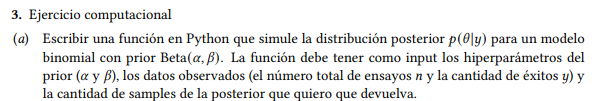

In [31]:
def posterior(alpha, beta_p, ensayos, exitos, samples):
    return stats.beta.rvs(exitos + alpha, ensayos - exitos + beta_p, samples)

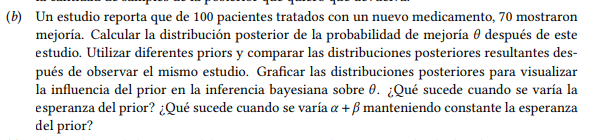

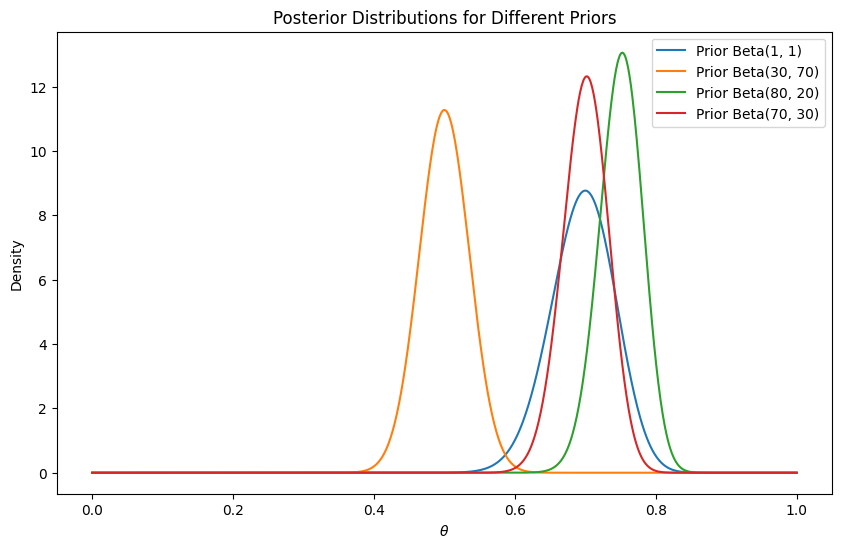

In [32]:
n = 100
y = 70
samples = 10000

priors = [(1, 1), (30, 70), (80, 20), (70, 30)]

x = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for alpha, beta in priors:
    posterior_samples = posterior(alpha, beta, n, y, samples)
    ax.plot(x, stats.beta.pdf(x, alpha + y, beta + n - y), label=f'Prior Beta({alpha}, {beta})')

ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Density')
ax.legend()
plt.title('Posterior Distributions for Different Priors')
plt.show()

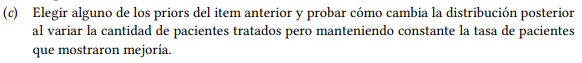

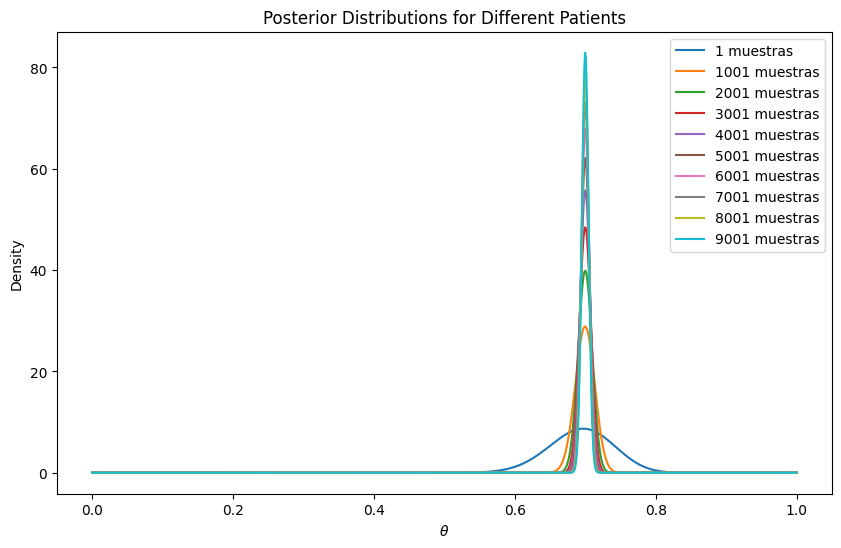

In [35]:
samples = 1000
x = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for n in range(1, 10000, 1000):
    y = int(n * 0.7)
    posterior_samples = posterior(70, 30, n, y, samples)
    ax.plot(x, stats.beta.pdf(x, 70 + y, 30 + n - y), label=f'{n} muestras')

ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Density')
ax.legend()
plt.title('Posterior Distributions for Different Patients')
plt.show()

EJERCICIO 4

# Distribución Beta:

$$ \theta \sim \text{Beta}(\alpha,\beta)  \hspace{1cm} 0\leq\theta\leq1,   \hspace{1cm} \alpha,\beta>0 $$

$$ p(\theta|\alpha,\beta)  = \frac{1}{\text{B}(\alpha,\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} \hspace{2cm} \text{donde} \hspace{0.5cm} \text{B}(\alpha,\beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)} = \int_0^1x^{\alpha-1}(1-x)^{\beta-1}dx$$

$$\text{E}(\theta) = \frac{\alpha}{\alpha+\beta} $$
$$\text{var}(\theta) = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)} $$

$$\text{moda}(\theta) = \frac{\alpha-1}{\alpha+\beta-2}  $$

Para una likelihood binomial:
- Con prior uniforme, la posterior es $\theta|y \sim \text{Beta}(y+1,n-y+1)$
- Con prior $\theta \sim \text{Beta}(\alpha,\beta)$ (que corresponde a $\alpha-1$ éxitos previos y $\beta -1$ fracasos previos), la posterior es $\theta \sim \text{Beta}(\alpha+y,\beta+n-y)$

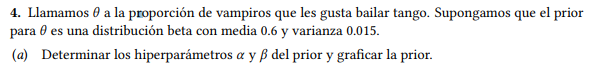

Text(0.5, 1.0, 'prior $p(\\theta)$ = $Beta(9,6)$')

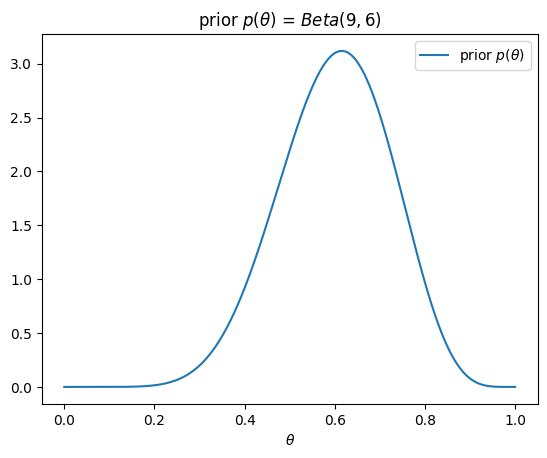

In [49]:
a,b = 9,6

x = np.linspace(0,1, 1000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.beta.pdf(x, a, b), label=r'prior $p(\theta)$')
ax.set_xlabel(r'$\theta$')
plt.legend()
plt.title(f'prior $p(\\theta)$ = $Beta({a},{b})$')

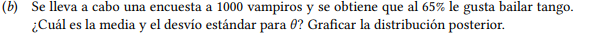

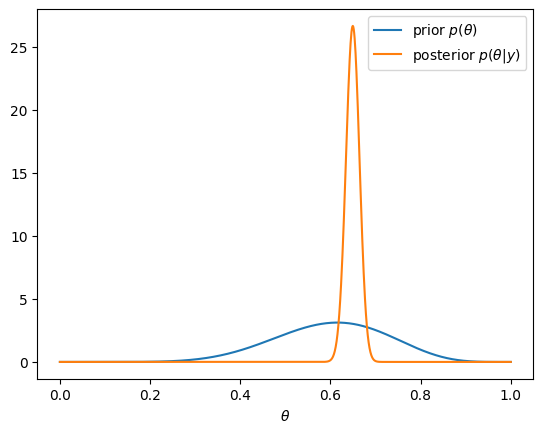

In [50]:
a=9
b=6
y=650
n=1000

x = np.linspace(0,1, 1000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.beta.pdf(x, a, b), label=r'prior $p(\theta)$')
ax.plot(x, stats.beta.pdf(x, a+y, b+n-y), label=r'posterior $p(\theta|y)$')
ax.set_xlabel(r'$\theta$')
plt.legend()

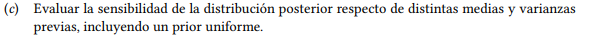

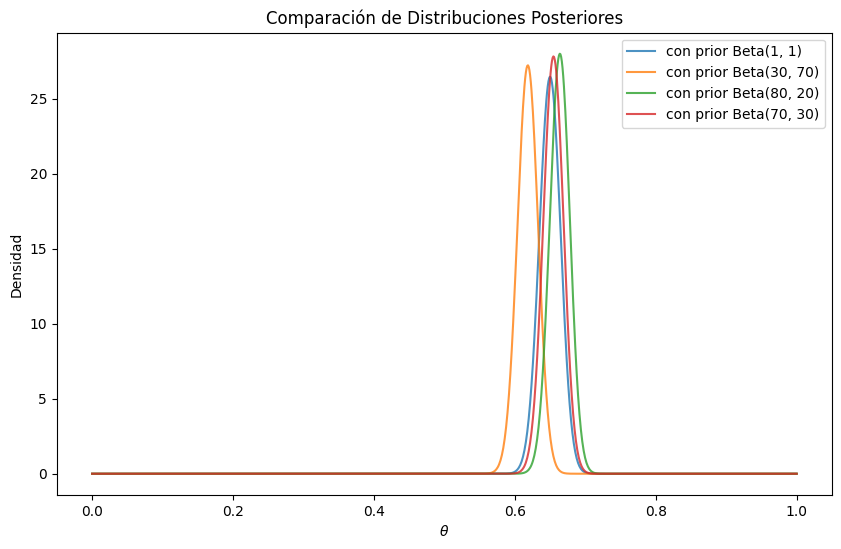

In [51]:
def plot_priors_comparison(priors, y, n):
    x = np.linspace(0, 1, 1000)
    plt.figure(figsize=(10, 6))

    for prior in priors:
        a, b = prior
        posterior = stats.beta(a+y, b+n-y)
        plt.plot(x, posterior.pdf(x), label=f'con prior Beta({a}, {b})',alpha=0.8)

    plt.xlabel(r'$\theta$')
    plt.ylabel('Densidad')
    plt.title('Comparación de Distribuciones Posteriores')
    plt.legend()
    plt.show()

# priors = [(1,1),(9,6)] #no cambia nada porque son ambos muy pequeños y se lleva todo la likelihood por n=1000
# priors = [(1,1),(3,2),(9,6),(90,60),(900,600),(9000,6000)] #distintas varianzas, misma media
# priors = [(801,201),(601,401),(501,501),(401,601),(201,801)] #distintas medias, misma varianza

plot_priors_comparison(priors, y, n)

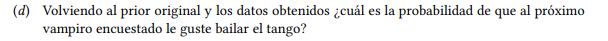

In [52]:
alpha_post = a + y
beta_post = b + n - y

esp_post = alpha_post / (alpha_post + beta_post)

print(esp_post)

0.6492610837438424


EJERCICIO 5

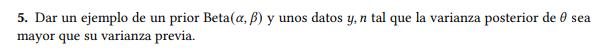

In [22]:
import numpy as np
from scipy.stats import beta

# Ejemplo de prior Beta(α, β)
alpha_prior = 2
beta_prior = 0.5

# Datos observados
n = 1
y = 0

# Parámetros de la distribución posterior
alpha_post = alpha_prior + y
beta_post = beta_prior + n - y

# Calcular la varianza de la distribución previa
var_prior = (alpha_prior * beta_prior) / ((alpha_prior + beta_prior)**2 * (alpha_prior + beta_prior + 1))

# Calcular la varianza de la distribución posterior
var_post = (alpha_post * beta_post) / ((alpha_post + beta_post)**2 * (alpha_post + beta_post + 1))

print(f"Varianza previa: {var_prior}")
print(f"Varianza posterior: {var_post}")

# Verificar si la varianza posterior es mayor que la varianza previa
if var_post > var_prior:
    print("La varianza posterior es mayor que la varianza previa.")
else:
    print("La varianza posterior no es mayor que la varianza previa.")


Varianza previa: 0.045714285714285714
Varianza posterior: 0.05442176870748299
La varianza posterior es mayor que la varianza previa.


EJERCICIO 9


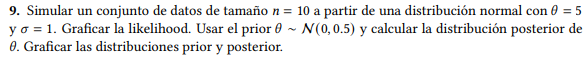

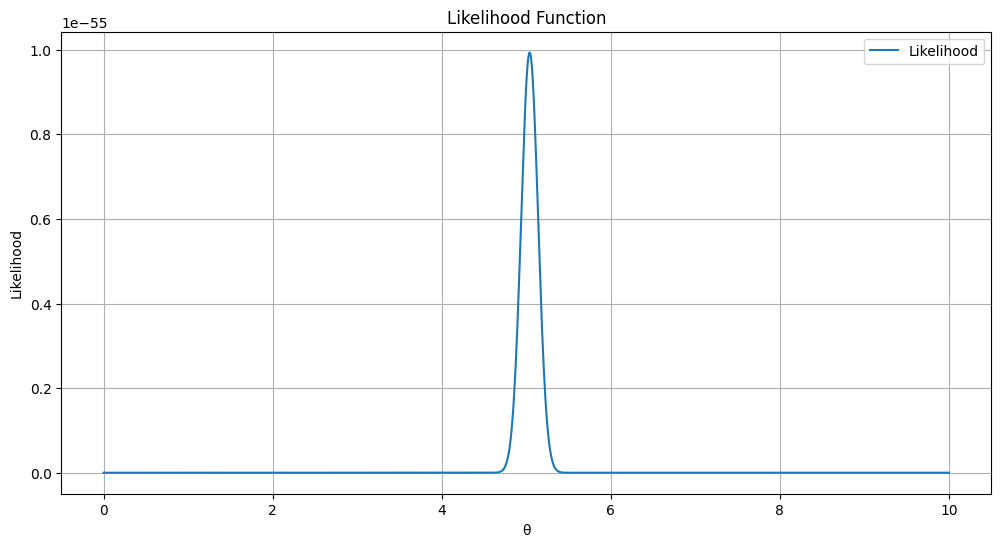

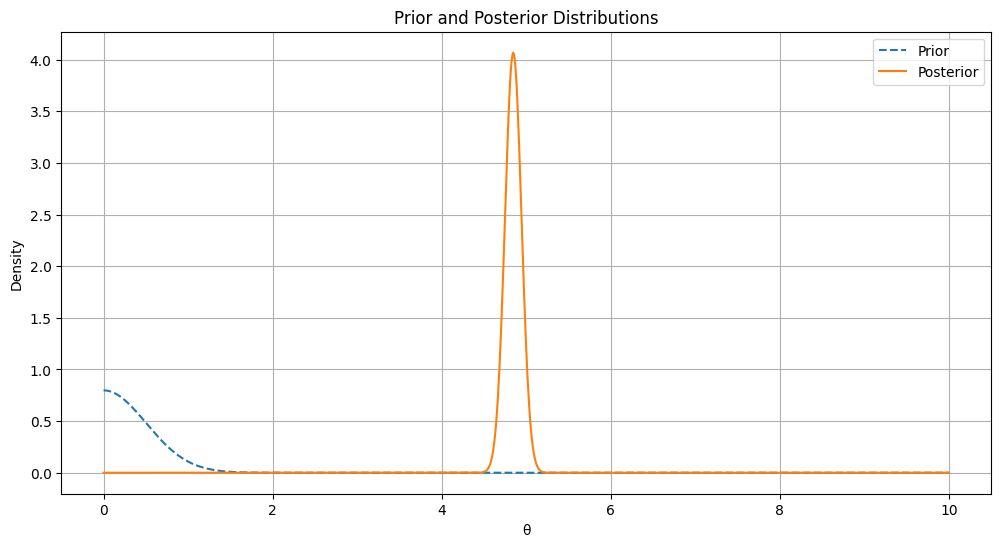

Posterior Mean (μ1): 4.846075896757767
Posterior Standard Deviation (σ1): 0.09805806756909202


In [53]:
n =  100
Y = stats.norm.rvs(5,1,n)

theta_values = np.linspace(0, 10, 1000)
likelihood_values = np.prod([stats.norm.pdf(Y, loc=theta, scale=1) for theta in theta_values], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(theta_values, likelihood_values, label='Likelihood')
plt.xlabel('θ')
plt.ylabel('Likelihood')
plt.title('Likelihood Function')
plt.legend()
plt.grid(True)
plt.show()

# Usar el prior θ ∼ N(0, 0.5)
prior_mu = 0
prior_sigma = 0.5
prior_values = stats.norm.pdf(theta_values, loc=prior_mu, scale=prior_sigma)

# Calcular la distribución posterior de θ
posterior_mu = (prior_mu / prior_sigma**2 + np.sum(Y) / 1**2) / (1 / prior_sigma**2 + n / 1**2)
posterior_sigma = np.sqrt(1 / (1 / prior_sigma**2 + n / 1**2))
posterior_values = stats.norm.pdf(theta_values, loc=posterior_mu, scale=posterior_sigma)

# Graficar las distribuciones prior y posterior
plt.figure(figsize=(12, 6))
plt.plot(theta_values, prior_values, label='Prior', linestyle='--')
plt.plot(theta_values, posterior_values, label='Posterior')
plt.xlabel('θ')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los parámetros de la distribución posterior
print(f"Posterior Mean (μ1): {posterior_mu}")
print(f"Posterior Standard Deviation (σ1): {posterior_sigma}")

EJERCICIO 10

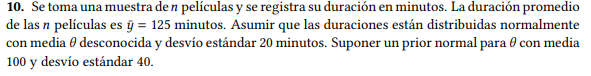

In [54]:
n = x
y_hat = 125
sigma = 20
mu = 100
t0 = 40

mu_n = ((mu / t0 ** 2) + (n * y_hat / sigma ** 2)) / (( 1 / t0 ** 2) + ( n / sigma ** 2))
sigma_n = np.sqrt( 1 / ((1 / t0 ** 2 ) + (n / sigma ** 2)))
posterior_n = stats.norm.pdf(n,loc=mu_n, scale=sigma_n)




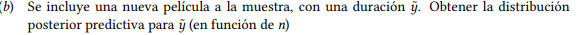

In [25]:
# y_var = yy

# mu_y_hat = mu_n
# sigma = np.sqrt(sigma_n ** 2 + y_var ** 2)

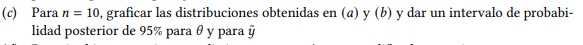

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12820\3278361697.py:35: UserWarning: Glyph 120579 (\N{MATHEMATICAL ITALIC SMALL THETA}) missing from current font.
  plt.tight_layout()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12820\3278361697.py:35: UserWarning: Glyph 119910 (\N{MATHEMATICAL ITALIC SMALL Y}) missing from current font.
  plt.tight_layout()


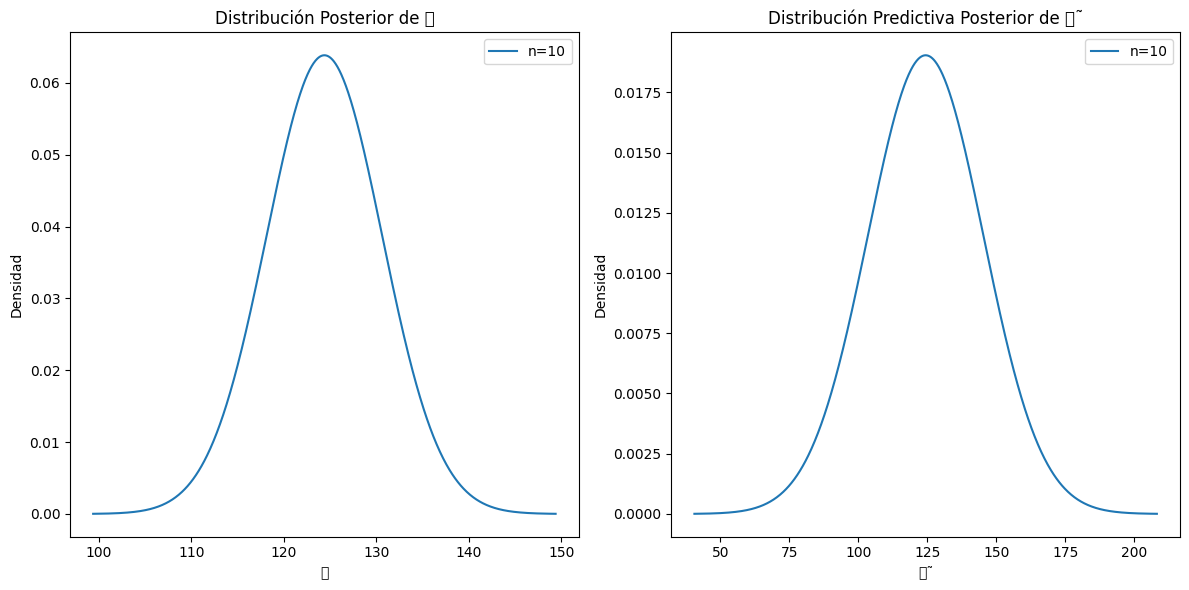

n=10:
Intervalo de confianza del 95% para 𝜃: (112.1462209703723, 136.63426683450572)
Intervalo de confianza del 95% para 𝑦˜: (83.3225425111878, 165.45794529369022)


In [56]:
n = 10
y_hat = 125
sigma = 20

mu = 100
t0 = 40

mu_n = ((mu / t0 ** 2) + (n * y_hat / sigma ** 2)) / (( 1 / t0 ** 2) + ( n / sigma ** 2))
sigma_n = np.sqrt( 1 / ((1 / t0 ** 2 ) + (n / sigma ** 2)))
posterior_n = stats.norm.pdf(n,loc=mu_n, scale=sigma_n)

y_var = 20

mu_y_hat = mu_n
sigma_y_hat = np.sqrt(sigma_n ** 2 + y_var ** 2)

plt.figure(figsize=(12, 6))
x_theta = np.linspace(mu_n - 4 * sigma_n, mu_n + 4 * sigma_n, 1000)
x_y_tilde = np.linspace(mu_y_hat - 4 * sigma_y_hat, mu_y_hat + 4 * sigma_y_hat, 1000)

plt.subplot(1, 2, 1)
plt.plot(x_theta, stats.norm.pdf(x_theta, mu_n, sigma_n), label=f'n={n}')
plt.title('Distribución Posterior de 𝜃')
plt.xlabel('𝜃')
plt.ylabel('Densidad')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_y_tilde, stats.norm.pdf(x_y_tilde, mu_y_hat, sigma_y_hat), label=f'n={n}')
plt.title('Distribución Predictiva Posterior de 𝑦˜')
plt.xlabel('𝑦˜')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()

ci_theta = (mu_n - 1.96 * sigma_n, mu_n + 1.96 * sigma_n)
ci_y_tilde = (mu_y_hat - 1.96 * sigma_y_hat, mu_y_hat + 1.96 * sigma_y_hat)

print(f'n={n}:')
print(f'Intervalo de confianza del 95% para 𝜃: {ci_theta}')
print(f'Intervalo de confianza del 95% para 𝑦˜: {ci_y_tilde}')

posterior IC(n=10) = 112.14644595716693 136.6340418477111
posterior IC(n=100) = 121.0226186329977 128.85269308770057


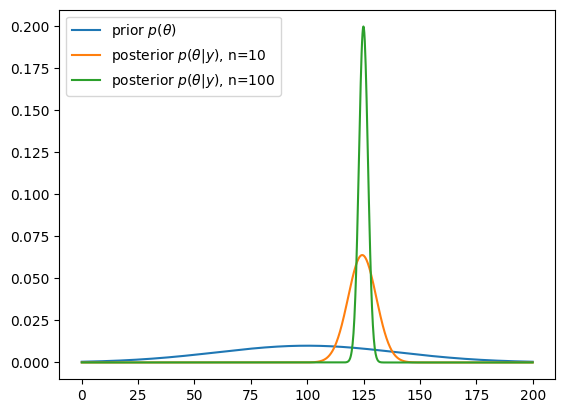

In [57]:
def inv_tau_n_squared(tau_0, sigma, n):
    return 1/tau_0**2 + n/sigma**2

def tau_n(tau_0, sigma, n):
    return 1/np.sqrt(inv_tau_n_squared(tau_0, sigma, n))

def mu_n(mu_0, tau_0, y_mean, sigma, n):
    return (mu_0/tau_0**2 + n*y_mean/sigma**2) / inv_tau_n_squared(tau_0, sigma, n)

sigma = 20
mu0 = 100
tau0 = 40
y_mean = 125
n = 10
n2 = 100

mu_posterior = mu_n(mu0, tau0, y_mean, sigma, n)
tau_posterior = tau_n(tau0, sigma, n)

mu_posterior2 = mu_n(mu0, tau0, y_mean, sigma, n2)
tau_posterior2 = tau_n(tau0, sigma, n2)


x = np.linspace(0, 200, 1000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.norm.pdf(x, loc=mu0, scale=tau0), label=r'prior $p(\theta)$')
ax.plot(x, stats.norm.pdf(x, loc=mu_posterior, scale=tau_posterior), label=r'posterior $p(\theta|y)$, n=10')
ax.plot(x, stats.norm.pdf(x, loc=mu_posterior2, scale=tau_posterior2), label=r'posterior $p(\theta|y)$, n=100')

ax.legend()

print('posterior IC(n=10) =', stats.norm.ppf(0.025, loc=mu_posterior, scale=tau_posterior), stats.norm.ppf(0.975, loc=mu_posterior, scale=tau_posterior))

n = 100
mu_posterior = mu_n(mu0, tau0, y_mean, sigma, n)
tau_posterior = tau_n(tau0, sigma, n)

print('posterior IC(n=100) =', stats.norm.ppf(0.025, loc=mu_posterior, scale=tau_posterior), stats.norm.ppf(0.975, loc=mu_posterior, scale=tau_posterior))


posterior IC(n=10) =  83.32329713983808 165.45719066503995
posterior IC(n=100) =  85.54335367374861 164.33195804694964


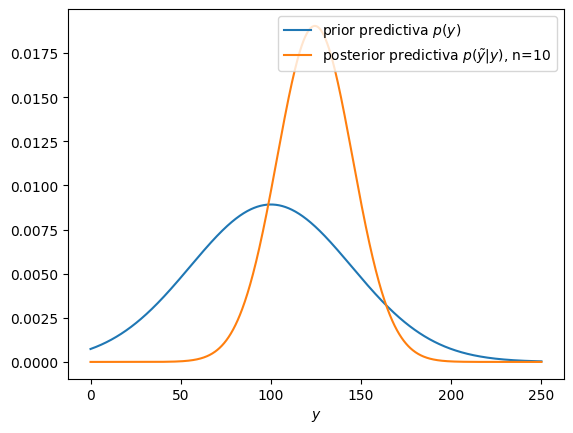

In [58]:
n = 10

mu_posterior = mu_n(mu0, tau0, y_mean, sigma, n)
tau_posterior = tau_n(tau0, sigma, n)
print('posterior IC(n=10) = ', stats.norm.ppf(0.025, loc=mu_posterior, scale=np.sqrt(tau_posterior**2 + sigma**2)),
       stats.norm.ppf(0.975, loc=mu_posterior, scale=np.sqrt(tau_posterior**2 + sigma**2)))

x = np.linspace(0, 250, 1000)
fig, ax = plt.subplots(1, 1)
ax.plot(x,  stats.norm.pdf(x, loc=mu0, scale=np.sqrt(tau0**2 + sigma**2)), label=r'prior predictiva $p(y)$')
ax.plot(x,  stats.norm.pdf(x, loc=mu_posterior, scale=np.sqrt(tau_posterior**2 + sigma**2)), 
        label=r'posterior predictiva $p(\tilde{y}|y)$, n=10')

n = 100
mu_posterior = mu_n(mu0, tau0, y_mean, sigma, n)
tau_posterior = tau_n(tau0, sigma, n)
print('posterior IC(n=100) = ',  stats.norm.ppf(0.025, loc=mu_posterior, scale=np.sqrt(tau_posterior**2 + sigma**2)),
       stats.norm.ppf(0.975, loc=mu_posterior, scale=np.sqrt(tau_posterior**2 + sigma**2)))

#ax.plot(x,  stats.norm.pdf(x, loc=mu_posterior, scale=np.sqrt(tau_posterior**2 + sigma**2)), 
#        label=r'posterior predictiva $p(\tilde{y}|y)$, n=100')
ax.set_xlabel(r'$y$')
plt.legend()


EJERCICIO 11

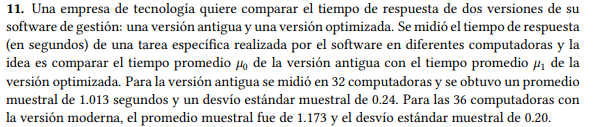

In [59]:
n0 = 32
mu0 = 1.013
sigma0 = 0.24

n1 = 36
mu1 = 1.173 
sigma1 = 0.2

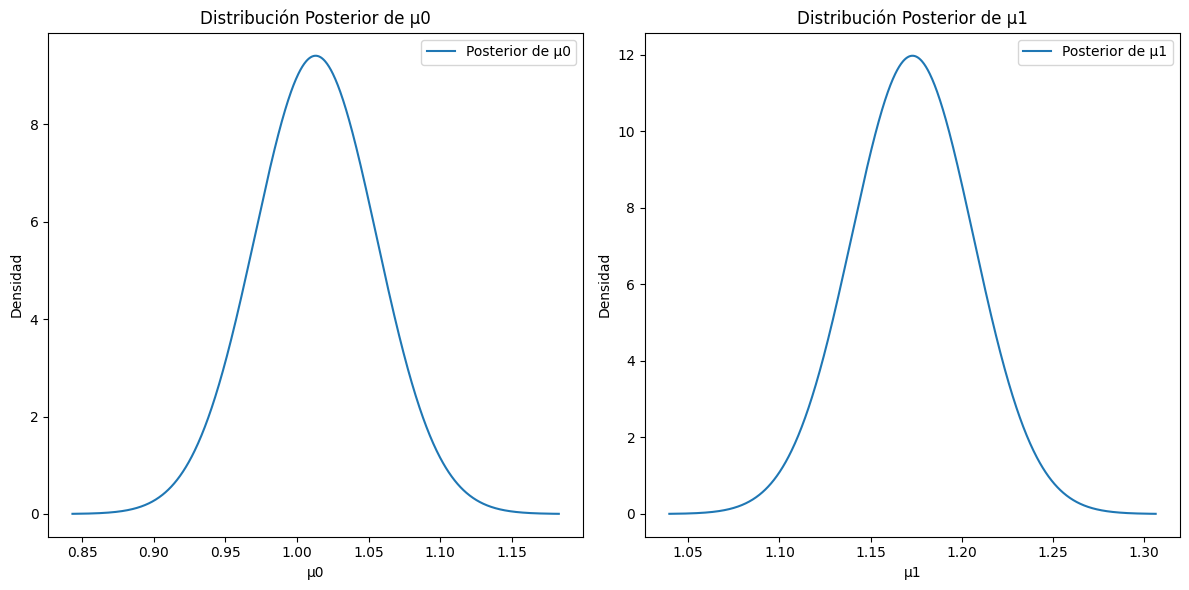

Media posterior para μ0: 1.013
Desvío estándar posterior para μ0: 0.04242640687119285
Media posterior para μ1: 1.173
Desvío estándar posterior para μ1: 0.03333333333333333


In [60]:
mu0_post = mu0
sigma0_post = sigma0 / np.sqrt(n0)

mu1_post = mu1
sigma1_post = sigma1 / np.sqrt(n1)

x_mu0 = np.linspace(mu0_post - 4 * sigma0_post, mu0_post + 4 * sigma0_post, 1000)
x_mu1 = np.linspace(mu1_post - 4 * sigma1_post, mu1_post + 4 * sigma1_post, 1000)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_mu0, stats.norm.pdf(x_mu0, mu0_post, sigma0_post), label='Posterior de μ0')
plt.title('Distribución Posterior de μ0')
plt.xlabel('μ0')
plt.ylabel('Densidad')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_mu1, stats.norm.pdf(x_mu1, mu1_post, sigma1_post), label='Posterior de μ1')
plt.title('Distribución Posterior de μ1')
plt.xlabel('μ1')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()

# Mostrar los resultados
print(f"Media posterior para μ0: {mu0_post}")
print(f"Desvío estándar posterior para μ0: {sigma0_post}")
print(f"Media posterior para μ1: {mu1_post}")
print(f"Desvío estándar posterior para μ1: {sigma1_post}")

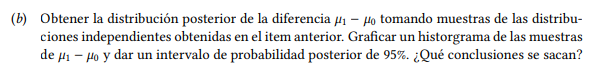

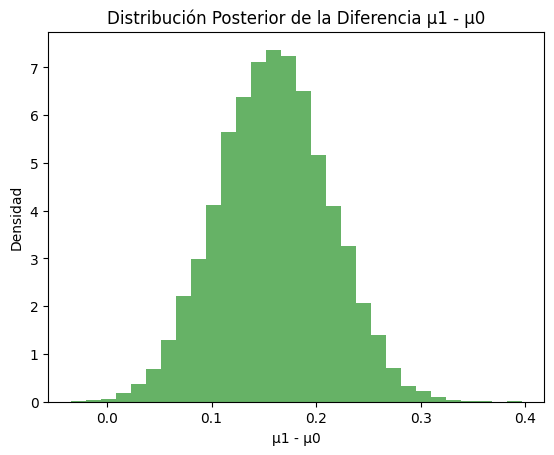

Intervalo de probabilidad posterior del 95% para la diferencia μ1 - μ0: (0.05783565301662645, 0.262392934737107)


In [61]:
num_samples = 10000

samples_mu0 = np.random.normal(mu0_post, sigma0_post, num_samples)
samples_mu1 = np.random.normal(mu1_post, sigma1_post, num_samples)

samples_diff = samples_mu1 - samples_mu0

plt.hist(samples_diff, bins=30, density=True, alpha=0.6, color='g')
plt.title('Distribución Posterior de la Diferencia μ1 - μ0')
plt.xlabel('μ1 - μ0')
plt.ylabel('Densidad')
plt.show()

ci_lower = np.percentile(samples_diff, 2.5)
ci_upper = np.percentile(samples_diff, 97.5)

print(f"Intervalo de probabilidad posterior del 95% para la diferencia μ1 - μ0: ({ci_lower}, {ci_upper})")

como cero no esta en el intervalo de confianza del 95 %, podemos asegurar con este nuvel de seguridad que hay una diferencia

EJERCICIO 12

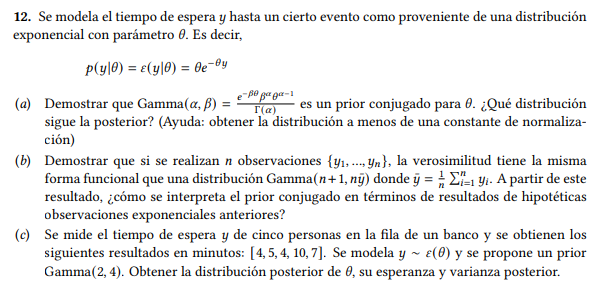